# Fake news detection

### a fake news are those stories thata are false manupulated no soild proof or no not from relaible sources

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import feature_extraction,linear_model,model_selection,preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

# read datasets

In [2]:
fake = pd.read_csv('./Fake.csv')
true = pd.read_csv('./True.csv')

In [3]:
fake.shape

(23481, 4)

In [4]:
true.shape

(21417, 4)

In [5]:
fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


# Data cleaning and preparation

In [6]:
#add flag to track fake and real
fake['target']= 'fake'
true['target'] = 'true'

In [7]:
#concatenate dataframes means join both data in single file
data = pd.concat([fake,true]).reset_index(drop=True)
data.shape

(44898, 5)

In [8]:
fake.shape[0]+ true.shape[0]

44898

In [9]:
#suffle the data
from sklearn.utils import shuffle
data = shuffle(data)
data = data.reset_index(drop=True)

In [10]:
data.shape

(44898, 5)

In [11]:
data.head(10)

,title,text,subject,date,target
0,Spain's constitutional court starts review of ...,MADRID (Reuters) - Spain s constitutional cour...,worldnews,"October 27, 2017",true
1,"Catalan parliament defies Madrid pressure, wor...",BARCELONA/MADRID (Reuters) - Catalan secession...,worldnews,"October 6, 2017",true
2,JILL STEIN’S PA Vote Recount Effort Not Lookin...,We mentioned in an article yesterday that the ...,politics,"Nov 28, 2016",fake
3,Trump Gives PATHETIC Reason For Why He Sucked...,If you tuned into the first presidential debat...,News,"September 27, 2016",fake
4,U.S. lawmakers question Mylan's Medicaid EpiPe...,(Reuters) - Two key U.S. congressional committ...,politicsNews,"September 2, 2016",true
5,Corsica's nationalists press for autonomy talk...,"AJACCIO, France (Reuters) - Corsican nationali...",worldnews,"December 4, 2017",true
6,Mood sours in ethnically split Cyprus over aid...,ATHENS (Reuters) - Cyprus said on Wednesday it...,worldnews,"October 4, 2017",true
7,WHOA! Why Is Our Classless President Following...,Just another classless act in the life of Pre...,left-news,"May 14, 2016",fake
8,Fractured French Right struggles to unite agai...,"PARIS (Reuters) - A year ago, France s conserv...",worldnews,"November 29, 2017",true
9,Flynn lawyer denies reports of quid pro quo pl...,WASHINGTON (Reuters) - The lawyer for former U...,politicsNews,"November 10, 2017",true


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   target   44898 non-null  object
dtypes: object(5)
memory usage: 1.7+ MB


In [13]:
#drop unneccessary column
data.drop(['date'],axis=1,inplace=True)
data.head()

,title,text,subject,target
0,Spain's constitutional court starts review of ...,MADRID (Reuters) - Spain s constitutional cour...,worldnews,true
1,"Catalan parliament defies Madrid pressure, wor...",BARCELONA/MADRID (Reuters) - Catalan secession...,worldnews,true
2,JILL STEIN’S PA Vote Recount Effort Not Lookin...,We mentioned in an article yesterday that the ...,politics,fake
3,Trump Gives PATHETIC Reason For Why He Sucked...,If you tuned into the first presidential debat...,News,fake
4,U.S. lawmakers question Mylan's Medicaid EpiPe...,(Reuters) - Two key U.S. congressional committ...,politicsNews,true


In [14]:
data.drop(['title'],axis=1,inplace=True)
data.head()

,text,subject,target
0,MADRID (Reuters) - Spain s constitutional cour...,worldnews,true
1,BARCELONA/MADRID (Reuters) - Catalan secession...,worldnews,true
2,We mentioned in an article yesterday that the ...,politics,fake
3,If you tuned into the first presidential debat...,News,fake
4,(Reuters) - Two key U.S. congressional committ...,politicsNews,true


In [15]:
#convert to Lowercase all text 
data['text']=data['text'].apply(lambda x:x.lower())
data.head()

,text,subject,target
0,madrid (reuters) - spain s constitutional cour...,worldnews,true
1,barcelona/madrid (reuters) - catalan secession...,worldnews,true
2,we mentioned in an article yesterday that the ...,politics,fake
3,if you tuned into the first presidential debat...,News,fake
4,(reuters) - two key u.s. congressional committ...,politicsNews,true


In [16]:
#Remove punctuation
import string

def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clear_str = ''.join(all_list)
    return clear_str

data['text'] = data['text'].apply(punctuation_removal)

In [17]:
#check
data.head()

,text,subject,target
0,madrid reuters spain s constitutional court o...,worldnews,true
1,barcelonamadrid reuters catalan secessionists...,worldnews,true
2,we mentioned in an article yesterday that the ...,politics,fake
3,if you tuned into the first presidential debat...,News,fake
4,reuters two key us congressional committee me...,politicsNews,true


In [18]:
# removing stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

[nltk_data] Error loading stopwords: <urlopen error [Errno -3]
[nltk_data]     Temporary failure in name resolution>


In [19]:
data.head()

,text,subject,target
0,madrid reuters spain s constitutional court o...,worldnews,true
1,barcelonamadrid reuters catalan secessionists...,worldnews,true
2,we mentioned in an article yesterday that the ...,politics,fake
3,if you tuned into the first presidential debat...,News,fake
4,reuters two key us congressional committee me...,politicsNews,true


In [20]:
#stopwords means like and or not condition in text to remove from data dfframe

In [21]:
data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [22]:
stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [23]:
data.head()

,text,subject,target
0,madrid reuters spain constitutional court frid...,worldnews,true
1,barcelonamadrid reuters catalan secessionists ...,worldnews,true
2,mentioned article yesterday real objective beh...,politics,fake
3,tuned first presidential debate last night alr...,News,fake
4,reuters two key us congressional committee mem...,politicsNews,true


# Basic data exploration

subject
Government News     1570
Middle-east          778
News                9050
US_News              783
left-news           4459
politics            6841
politicsNews       11272
worldnews          10145
Name: text, dtype: int64


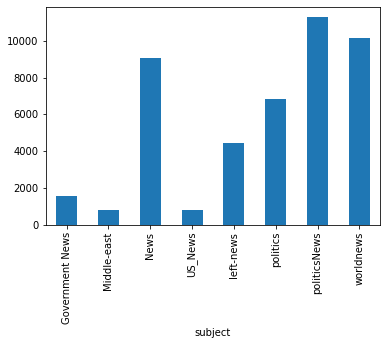

In [24]:
# how maany articles per subject?
print(data.groupby(['subject'])['text'].count())
data.groupby(['subject'])['text'].count().plot(kind="bar")
plt.show()

target
fake    23481
true    21417
Name: text, dtype: int64
         text  subject
target                
fake    23481    23481
true    21417    21417


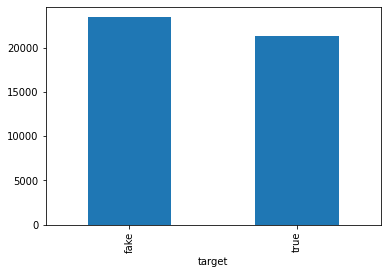

In [25]:
# how many fake and real articles?
print(data.groupby(['target'])['text'].count())
print(data.groupby(['target']).count()) # by default give all column data
data.groupby(['target'])['text'].count().plot(kind='bar')
plt.show()

In [26]:
# pip install wordcloud

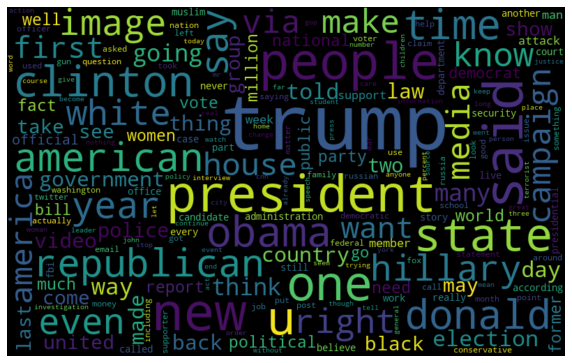

In [27]:
# word cloud for fake news
from wordcloud import WordCloud

fake_data = data[data['target']=='fake']
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width=800,height=500,max_font_size=110,collocations=False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

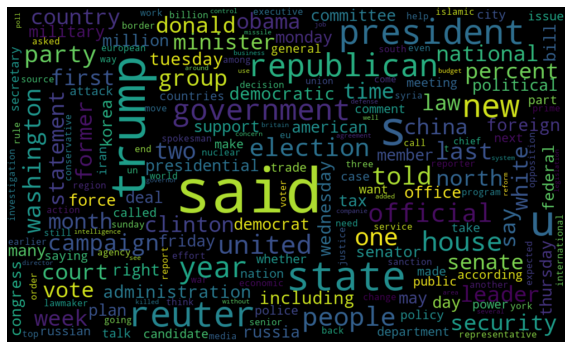

In [28]:
true_data = data[data['target']=='true']
all_wordstrue = ' '.join([word for word in true_data.text])
wordcloudtrue = WordCloud(width=1000,height=600,max_font_size=110,collocations=False).generate(all_wordstrue)
plt.figure(figsize=(10,8))
plt.imshow(wordcloudtrue,interpolation='bilinear')
plt.axis('off')
plt.show()

In [29]:
# most frequent words counter
from nltk import tokenize
token_space = tokenize.WhitespaceTokenizer()
def counter(text,column_text,quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_parse = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_parse)
    df_frequency = pd.DataFrame({"word":list(frequency.keys()),
                                "Frequency":list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns="Frequency",n=quantity)
    plt.figure(figsize=(12,8))
    print(df_frequency)
    ax = sns.barplot(data=df_frequency,x="word",y="Frequency",color='blue')
#     ax = sns.barplot(data = df_frequency,x="Word",y = "Frequency",color="blue")
    ax.set(ylabel="Count")
    plt.xticks(rotation="vertical")
    plt.show()

           word  Frequency
13        trump      73422
161        said      31008
134      people      25941
45    president      25495
32        would      23420
1098        one      22865
671          us      22005
59      clinton      17957
332       obama      17760
296        like      17596
149      donald      17101
100        also      15221
463         new      14135
50         news      14099
237        even      13658
55      hillary      13510
304       white      12767
298        time      12689
23        state      12494
324         via      11164


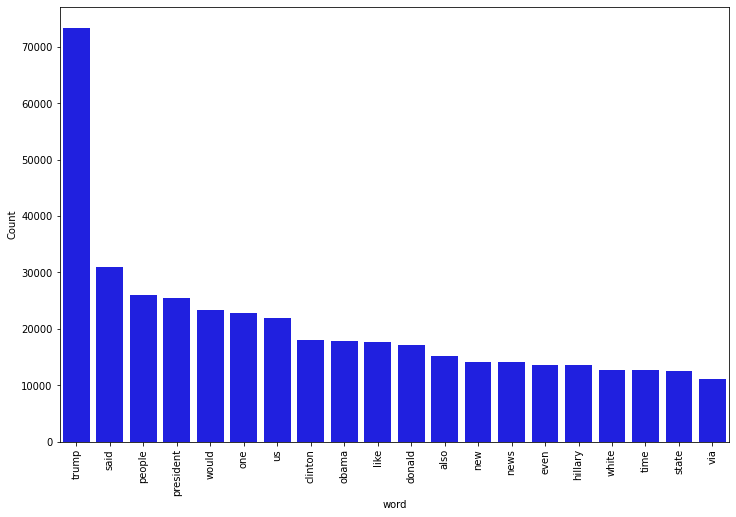

In [30]:
counter(data[data['target']=="fake"],"text",20)

            word  Frequency
6           said      99017
1050       trump      42061
406           us      40847
50         would      31418
1        reuters      28306
605    president      25223
15         state      18547
143   government      17851
471          new      16712
511        house      16294
1109      states      16063
851         also      15935
680       united      15566
1684  republican      15273
204       people      14604
131         told      14243
29         could      13650
600         last      12579
224          one      12295
962   washington      12088


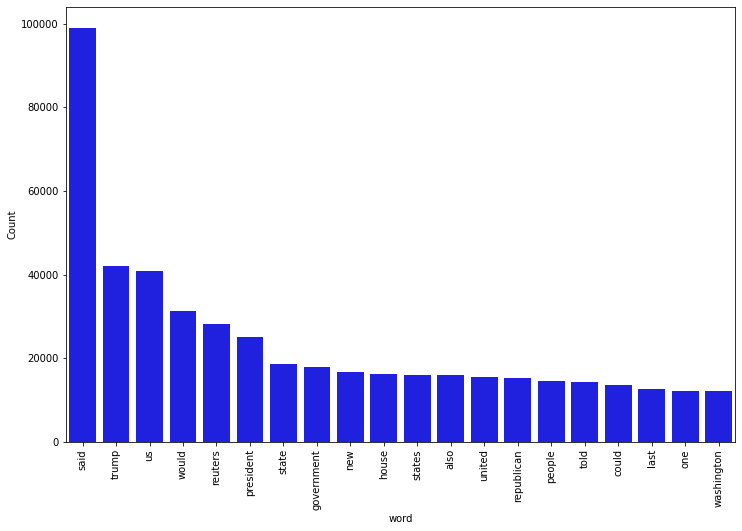

In [31]:
counter(data[data['target']=="true"],"text",20)

# Modelling

In [50]:
# function to plot the confusion matrix
from sklearn import metrics
import itertools

def plot_confusion_matrix(cm,classes,normalize=False,
                         title = "Confusion Matrix",
                         cmap=plt.cm.Blues):
    
    plt.imshow(cm,interpolation="nearest",cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=45)
    plt.yticks(tick_marks,classes)
    
    if normalize:
        cm = cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
        print("Normalize confusion matrix")
    else:
        print("confusion matrix without normalization")
        
    thresh = cm.max()/2
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,cm[i,j],
                horizontalalignment="center",
                 color="white" if cm[i,j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel("True label")
    plt.xlabel("predicted label")

# spliting Datasets

In [51]:
x_train,x_test,y_train,y_test = train_test_split(data['text'],data.target,test_size=0.2,random_state=42)

# Decision Tree Classifier

In [52]:
from sklearn.tree import DecisionTreeClassifier

# vectorizing and applyinhg TF-IDF
pipe = Pipeline([('vect',CountVectorizer()),
                ('tfidf',TfidfTransformer()),
                ('model',DecisionTreeClassifier(criterion='entropy',
                                               max_depth=20,
                                               splitter='best',
                                               random_state=42))])

#fitting the model
model = pipe.fit(x_train,y_train)
prediction = model.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test,prediction)*100,2)))

accuracy: 99.68%


In [53]:

cm = metrics.confusion_matrix(y_test,prediction)
cm

array([[4636,   10],
       [  19, 4315]])

confusion matrix without normalization


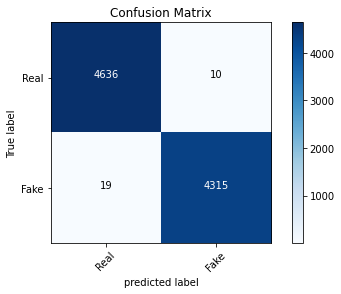

In [55]:
plot_confusion_matrix(cm,classes=['Real','Fake'])